In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import numba

from typing import Dict

from saturation.simulation import *
from saturation.distributions import *
from saturation.geometry import *
from saturation.plotting import *

In [2]:
def plot_statistics(stats: pd.DataFrame):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

    # Plot crater count
    ax = axes[0][0]
    ax.plot(stats.n_craters_generated, stats.n_craters_in_observation_area)
    ax.set_xlabel('Craters Generated')
    ax.set_ylabel('Observable Craters')

    # Plot crater count
    ax = axes[0][1]
    ax.plot(stats.n_craters_generated, stats.areal_density)
    ax.set_xlabel('Craters Generated')
    ax.set_ylabel('Areal Density')

    # Plot Z statistic
    ax = axes[1][0]
    ax.plot(stats.n_craters_generated, stats.z)
    ax.axhline(-1.96, color='g', ls='--')
    ax.axhline(1.96, color='g', ls='--')
    ax.axhline(-2.58, color='r', ls='--')
    ax.axhline(2.58, color='r', ls='--')
    ax.set_xlabel('Craters Generated')
    ax.set_ylabel('Z Statistic')

    # Plot Za statistic
    ax = axes[1][1]
    ax.plot(stats.n_craters_generated, stats.za)
    ax.axhline(-1.96, color='g', ls='--')
    ax.axhline(1.96, color='g', ls='--')
    ax.axhline(-2.58, color='r', ls='--')
    ax.axhline(2.58, color='r', ls='--')
    ax.set_xlabel('Craters Generated')
    ax.set_ylabel('Za Statistic')

    plt.show()

In [3]:
base_path = '/home/mason/output/'
filenames = [
    f'{base_path}/sim_run3_2_9_0.4_1.5_{x}.txt'
    for x in range(10)
]

sim_stats = []
for index, filename in enumerate(filenames):
    stats = pd.read_csv(filename)
    stats['simulation_id'] = index
    sim_stats.append(stats)

stats = pd.concat(sim_stats, axis=0).dropna()

In [4]:
def percentile(n):
    @numba.jit(forceobj=True, fastmath=True)
    def _percentile(x):
        return np.percentile(x, n)
    return _percentile

In [5]:
columns_to_aggregate = [
    'n_craters_in_observation_area',
    'areal_density',
    'z',
    'za'
]
aggregations = {
    x: [
        'min',
        pd.NamedAgg(column=x, aggfunc=percentile(25)),
        'mean',
        pd.NamedAgg(column=x, aggfunc=percentile(75)),
        'max'
    ]
    for x in columns_to_aggregate
}
col_names = [
    [
        f'{x}_min',
        f'{x}_25_percentile',
        f'{x}_mean',
        f'{x}_75_percentile',
        f'{x}_max',
    ]
    for x in columns_to_aggregate
]
col_names = [y for x in col_names for y in x]

grouped = stats.groupby(['n_craters_generated']).agg(
    aggregations
)

grouped.columns = col_names
grouped.reset_index(inplace=True)

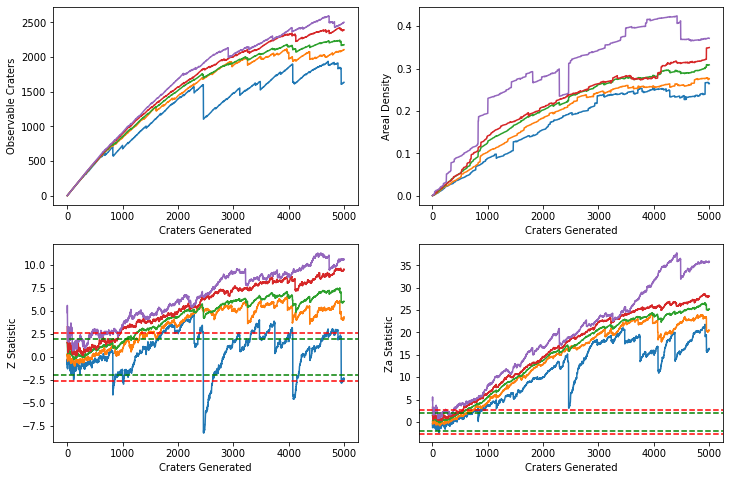

In [6]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Plot crater count
ax = axes[0][0]
ax.plot(grouped.n_craters_generated, grouped.n_craters_in_observation_area_min)
ax.plot(grouped.n_craters_generated, grouped.n_craters_in_observation_area_25_percentile)
ax.plot(grouped.n_craters_generated, grouped.n_craters_in_observation_area_mean)
ax.plot(grouped.n_craters_generated, grouped.n_craters_in_observation_area_75_percentile)
ax.plot(grouped.n_craters_generated, grouped.n_craters_in_observation_area_max)
ax.set_xlabel('Craters Generated')
ax.set_ylabel('Observable Craters')

# Plot crater count
ax = axes[0][1]
ax.plot(grouped.n_craters_generated, grouped.areal_density_min)
ax.plot(grouped.n_craters_generated, grouped.areal_density_25_percentile)
ax.plot(grouped.n_craters_generated, grouped.areal_density_mean)
ax.plot(grouped.n_craters_generated, grouped.areal_density_75_percentile)
ax.plot(grouped.n_craters_generated, grouped.areal_density_max)
ax.set_xlabel('Craters Generated')
ax.set_ylabel('Areal Density')

# Plot Z statistic
ax = axes[1][0]
ax.plot(grouped.n_craters_generated, grouped.z_min)
ax.plot(grouped.n_craters_generated, grouped.z_25_percentile)
ax.plot(grouped.n_craters_generated, grouped.z_mean)
ax.plot(grouped.n_craters_generated, grouped.z_75_percentile)
ax.plot(grouped.n_craters_generated, grouped.z_max)
ax.axhline(-1.96, color='g', ls='--')
ax.axhline(1.96, color='g', ls='--')
ax.axhline(-2.58, color='r', ls='--')
ax.axhline(2.58, color='r', ls='--')
ax.set_xlabel('Craters Generated')
ax.set_ylabel('Z Statistic')

# Plot Za statistic
ax = axes[1][1]
ax.plot(grouped.n_craters_generated, grouped.za_min)
ax.plot(grouped.n_craters_generated, grouped.za_25_percentile)
ax.plot(grouped.n_craters_generated, grouped.za_mean)
ax.plot(grouped.n_craters_generated, grouped.za_75_percentile)
ax.plot(grouped.n_craters_generated, grouped.za_max)
ax.axhline(-1.96, color='g', ls='--')
ax.axhline(1.96, color='g', ls='--')
ax.axhline(-2.58, color='r', ls='--')
ax.axhline(2.58, color='r', ls='--')
ax.set_xlabel('Craters Generated')
ax.set_ylabel('Za Statistic')

plt.show()

In [7]:
base_path = '/home/mason/code/kirchoff_saturation/output/'
filenames = [
    f'{base_path}/minton_comp_Sinus-run{x}.csv'
    for x in range(1, 11)
    if x not in {4, 5}
]

sim_stats = []
for index, filename in enumerate(filenames):
    stats = pd.read_csv(filename, skiprows=1)
    stats.columns = ['n_craters_generated', 'n_craters_in_observation_area', 'areal_density', 'z', 'za']
    stats.areal_density = stats.areal_density / 10000**2
    stats['simulation_id'] = index
    sim_stats.append(stats)

stats = pd.concat(sim_stats, axis=0).dropna()

In [8]:
columns_to_aggregate = [
    'n_craters_in_observation_area',
    'areal_density',
    'z',
    'za'
]
aggregations = {
    x: [
        'min',
        pd.NamedAgg(column=x, aggfunc=percentile(25)),
        'mean',
        pd.NamedAgg(column=x, aggfunc=percentile(75)),
        'max'
    ]
    for x in columns_to_aggregate
}
col_names = [
    [
        f'{x}_min',
        f'{x}_25_percentile',
        f'{x}_mean',
        f'{x}_75_percentile',
        f'{x}_max',
    ]
    for x in columns_to_aggregate
]
col_names = [y for x in col_names for y in x]

grouped = stats.groupby(['n_craters_generated']).agg(
    aggregations
)

grouped.columns = col_names
grouped.reset_index(inplace=True)

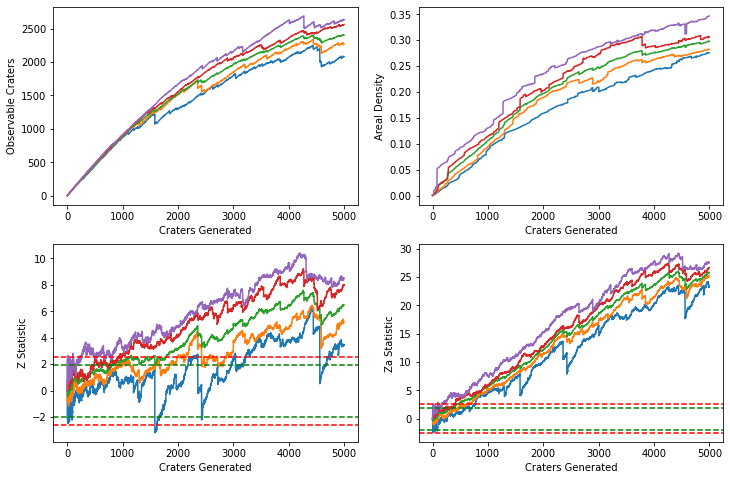

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Plot crater count
ax = axes[0][0]
ax.plot(grouped.n_craters_generated, grouped.n_craters_in_observation_area_min)
ax.plot(grouped.n_craters_generated, grouped.n_craters_in_observation_area_25_percentile)
ax.plot(grouped.n_craters_generated, grouped.n_craters_in_observation_area_mean)
ax.plot(grouped.n_craters_generated, grouped.n_craters_in_observation_area_75_percentile)
ax.plot(grouped.n_craters_generated, grouped.n_craters_in_observation_area_max)
ax.set_xlabel('Craters Generated')
ax.set_ylabel('Observable Craters')

# Plot crater count
ax = axes[0][1]
ax.plot(grouped.n_craters_generated, grouped.areal_density_min)
ax.plot(grouped.n_craters_generated, grouped.areal_density_25_percentile)
ax.plot(grouped.n_craters_generated, grouped.areal_density_mean)
ax.plot(grouped.n_craters_generated, grouped.areal_density_75_percentile)
ax.plot(grouped.n_craters_generated, grouped.areal_density_max)
ax.set_xlabel('Craters Generated')
ax.set_ylabel('Areal Density')

# Plot Z statistic
ax = axes[1][0]
ax.plot(grouped.n_craters_generated, grouped.z_min)
ax.plot(grouped.n_craters_generated, grouped.z_25_percentile)
ax.plot(grouped.n_craters_generated, grouped.z_mean)
ax.plot(grouped.n_craters_generated, grouped.z_75_percentile)
ax.plot(grouped.n_craters_generated, grouped.z_max)
ax.axhline(-1.96, color='g', ls='--')
ax.axhline(1.96, color='g', ls='--')
ax.axhline(-2.58, color='r', ls='--')
ax.axhline(2.58, color='r', ls='--')
ax.set_xlabel('Craters Generated')
ax.set_ylabel('Z Statistic')

# Plot Za statistic
ax = axes[1][1]
ax.plot(grouped.n_craters_generated, grouped.za_min)
ax.plot(grouped.n_craters_generated, grouped.za_25_percentile)
ax.plot(grouped.n_craters_generated, grouped.za_mean)
ax.plot(grouped.n_craters_generated, grouped.za_75_percentile)
ax.plot(grouped.n_craters_generated, grouped.za_max)
ax.axhline(-1.96, color='g', ls='--')
ax.axhline(1.96, color='g', ls='--')
ax.axhline(-2.58, color='r', ls='--')
ax.axhline(2.58, color='r', ls='--')
ax.set_xlabel('Craters Generated')
ax.set_ylabel('Za Statistic')

plt.show()